# **Proyek Analisis Data: Bike Sharing Dataset**

- **Nama:** Masitha Mirzaky Firdaus
- **Email:** masithamf@gmail.com
- **ID Dicoding:** masithamf

## **Menentukan Pertanyaan Bisnis**

- Bagaimana perilaku user rental sepeda berdasarkan kondisi lingkungan dan musim?
- Seberapa sering user melakukan rental sepeda berdasarkan jam?



## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## **Data Wrangling**

### Gathering Data
(pengumpulan data)

In [2]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Metode merge()

day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Gathering data dilakukan dengan mengimport 2 file csv menggunakan library pandas.
- Pada data day.csv menunjukkan pengumpulan data perentalan sepeda berbasis hari selama 731 hari.
- Pada data hour.csv menunjukkan pengumpulan data perentalan sepeda berbasis jam selama 17379 jam.



### Assessing Data
(mengidentifikasi masalah yang terdapat dalam data)

**Dataset day.csv**

In [7]:
# Missing Value day.csv

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# Duplicate Data day.csv

print("Jumlah data duplikasi: ", day_df.duplicated().sum())

Jumlah data duplikasi:  0


In [10]:
# Outliers day.csv

# Select only numerical columns for outlier detection
numerical_df = day_df.select_dtypes(include=np.number)

q25, q75 = np.percentile(numerical_df, 25), np.percentile(numerical_df, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

# Calculate outliers for each numerical column
outliers_day = []
for col in numerical_df.columns:
  col_outliers = [x for x in numerical_df[col] if x < minimum or x > maximum]
  outliers_day.extend(col_outliers)

print("Jumlah outlier: ", len(outliers_day))

Jumlah outlier:  2451


**Dataset hour.csv**

In [11]:
# Missing Value hour.csv

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
# Duplicate Data hour.csv

print("Jumlah data duplikasi: ", hour_df.duplicated().sum())

Jumlah data duplikasi:  0


In [14]:
# Outliers hour.csv

# Select only numerical columns for outlier detection
numerical_df = hour_df.select_dtypes(include=np.number)

q25, q75 = np.percentile(numerical_df, 25), np.percentile(numerical_df, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

# Calculate outliers for each numerical column
outliers_hour = []
for col in numerical_df.columns:
  col_outliers = [x for x in numerical_df[col] if x < minimum or x > maximum]
  outliers_hour.extend(col_outliers)

print("Jumlah outlier: ", len(outliers_hour))

Jumlah outlier:  51769


**Insight:**
- Kedua csv file di atas (day.csv dan hour.csv) memiliki Tipe Data yang salah untuk parameter dteday. seharusnya tipe data untuk tanggal adalah datetime.
- Terdapat outliers pada kedua csv file di atas dengan jumlah outliers yang berbeda.
- Missing Value, Duplicate data, dan Inaccurate Value tidak ditemukan dalam kedua csv file di atas.

### Cleaning Data
(menyelesaikan masalah yang ditemukan pada proses assesing data)

**Dataset day.csv**

In [15]:
# Penanangan kesalahan tipe data day.csv

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# Penanganan Outliers day.csv (metode dropping)

q25 = numerical_df.quantile(0.25)
q75 = numerical_df.quantile(0.75)
iqr = q75 - q25

maximum = q75 + (1.5*iqr)
minimum = q25 - (1.5*iqr)

kondisi_outliers = (numerical_df < minimum) | (numerical_df > maximum)
day_df.drop(day_df[kondisi_outliers].index, inplace=True)

**Dataset hour.csv**

In [17]:
# Penanangan kesalahan tipe data hour.csv

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
# Penanganan Outliers hour.csv (metode dropping)

q25 = numerical_df.quantile(0.25)
q75 = numerical_df.quantile(0.75)
iqr = q75 - q25

maximum = q75 + (1.5*iqr)
minimum = q25 - (1.5*iqr)

kondisi_outliers = (numerical_df < minimum) | (numerical_df > maximum)
hour_df.drop(hour_df[kondisi_outliers].index, inplace=True)

**Insight:**
- Tipe data untuk dteday pada day.csv dan hour.csv telah diubah ke tipe data datetime dengan fungsi pd.to_datetime() dari library pandas.
- Penanngan untuk Outliers menggunakan quantile() untuk menghitung kuartal dan drop() untuk drop outliers.

## **Exploratory Data Analysis (EDA)**

### Explore Parameter Statistik

**Dataset day.csv**

In [19]:
# Metode describe() dataset day.csv

day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
day_df.describe(include="all") # menyertakan kolom non numerik

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

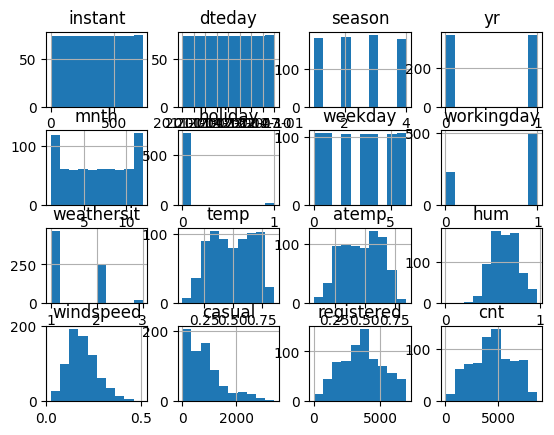

In [21]:
# Metode hist() day.csv

day_df.hist()

In [22]:
# Metode corr() day.csv

day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [23]:
# Metode cov() day.scv

day_df.cov()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,4.459100e+04,3.852662e+18,9.669315e+01,9.150000e+01,3.620589e+02,5.698630e-01,-6.849315e-03,-4.260274e-01,-2.471233e+00,5.820548e+00,5.252561e+00,4.924884e-01,-1.843008e+00,3.990958e+04,2.173278e+05,2.572374e+05
dteday,3.852662e+18,3.328700e+32,8.354288e+15,7.905600e+15,3.128189e+16,4.923616e+13,-5.917808e+11,-3.680877e+13,-2.135145e+14,5.028953e+14,4.538213e+14,4.255100e+13,-1.592359e+14,3.448188e+18,1.877712e+19,2.222531e+19
season,9.669315e+01,8.354288e+15,1.233892e+00,-1.025055e-03,3.188082e+00,-1.956412e-03,-6.858685e-03,6.452036e-03,1.162791e-02,6.797769e-02,6.206681e-02,3.250367e-02,-1.971750e-02,1.604725e+02,7.134020e+02,8.738745e+02
yr,9.150000e+01,7.905600e+15,-1.025055e-03,2.503420e-01,-3.095778e-03,6.652550e-04,-5.477578e-03,-4.684894e-04,-1.328449e-02,4.359920e-03,3.759325e-03,-7.885352e-03,-4.582116e-04,8.538687e+01,4.639067e+02,5.492936e+02
mnth,3.620589e+02,3.128189e+16,3.188082e+00,-3.095778e-03,1.191570e+01,1.107322e-02,6.580777e-02,-9.476604e-03,8.187321e-02,1.391425e-01,1.279518e-01,1.092471e-01,-5.551002e-02,2.915438e+02,1.580687e+03,1.872231e+03
holiday,5.698630e-01,4.923616e+13,-1.956412e-03,6.652550e-04,1.107322e-02,2.794071e-02,-3.416787e-02,-1.967655e-02,-3.153871e-03,-8.737378e-04,-8.854736e-04,-3.794347e-04,8.150104e-05,6.229170e+00,-2.836112e+01,-2.213195e+01
weekday,-6.849315e-03,-5.917808e+11,-6.858685e-03,-5.477578e-03,6.580777e-02,-3.416787e-02,4.019171e+00,3.338081e-02,3.395986e-02,-6.237250e-05,-2.462399e-03,-1.491435e-02,2.218967e-03,8.248541e+01,1.794443e+02,2.619297e+02
workingday,-4.260274e-01,-3.680877e+13,6.452036e-03,-4.684894e-04,-9.476604e-03,-1.967655e-02,3.338081e-02,2.164421e-01,1.551450e-02,4.484585e-03,3.956198e-03,1.611977e-03,-6.776997e-04,-1.654839e+02,2.206011e+02,5.511723e+01
weathersit,-2.471233e+00,-2.135145e+14,1.162791e-02,-1.328449e-02,8.187321e-02,-3.153871e-03,3.395986e-02,1.551450e-02,2.969098e-01,-1.202928e-02,-1.079619e-02,4.587027e-02,1.668479e-03,-9.254384e+01,-2.213751e+02,-3.139189e+02
temp,5.820548e+00,5.028953e+14,6.797769e-02,4.359920e-03,1.391425e-01,-8.737378e-04,-6.237250e-05,4.484585e-03,-1.202928e-02,3.350767e-02,2.958266e-02,3.310151e-03,-2.240605e-03,6.828378e+01,1.542309e+02,2.225147e+02


**Dataset hour.csv**

In [24]:
# Metode describe() dataset hour.csv

hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [25]:
hour_df.describe(include="all") # menyertakan kolom non numerik

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

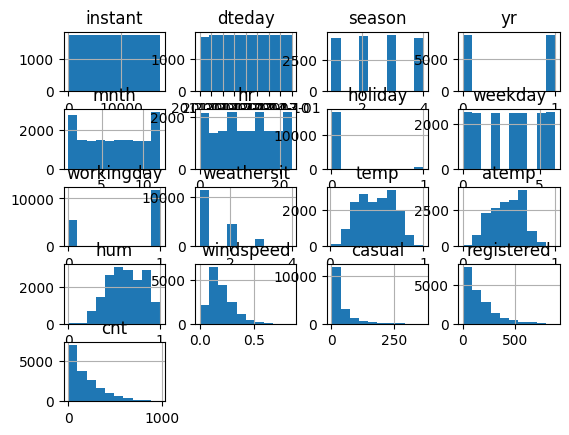

In [26]:
# Metode hist() hour.csv

hour_df.hist()

In [27]:
# Metode corr() hour.csv

hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [28]:
# Metode cov() hour.scv

hour_df.cov()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,2.517058e+07,9.105977e+19,2.243844e+03,2.172443e+03,8.439269e+03,-1.656372e+02,1.234820e+01,1.365370e+01,-7.975601e+00,-4.554126e+01,1.315561e+02,1.186482e+02,9.269692e+00,-4.572973e+01,3.915671e+04,2.141754e+05,2.533321e+05
dteday,9.105977e+19,3.294307e+32,8.125772e+15,7.855978e+15,3.057114e+16,-7.731366e+14,4.471485e+13,4.995644e+13,-2.843455e+13,-1.631937e+14,4.755696e+14,4.290144e+14,3.570209e+13,-1.657490e+14,1.412338e+17,7.731913e+17,9.144251e+17
season,2.243844e+03,8.125772e+15,1.225268e+00,-5.945620e-03,3.160817e+00,-4.681680e-02,-1.773504e-03,-5.185001e-03,7.080358e-03,-1.027855e-02,6.650626e-02,6.075374e-02,3.216705e-02,-2.028232e-02,6.560463e+00,2.918978e+01,3.575025e+01
yr,2.172443e+03,7.855978e+15,-5.945620e-03,2.500078e-01,-1.800731e-02,-1.336923e-02,5.593117e-04,-4.497864e-03,-5.110521e-04,-6.124129e-03,3.939123e-03,3.370173e-03,-8.059425e-03,-5.346066e-04,3.519905e+00,1.919878e+01,2.271869e+01
mnth,8.439269e+03,3.057114e+16,3.160817e+00,-1.800731e-02,1.182518e+01,-1.372392e-01,1.059456e-02,7.173336e-02,-5.564854e-03,1.187142e-02,1.335515e-01,1.229753e-01,1.090775e-01,-5.695711e-02,1.160686e+01,6.364109e+01,7.524796e+01
hr,-1.656372e+02,-7.731366e+14,-4.681680e-02,-1.336923e-02,-1.372392e-01,4.780900e+01,5.538086e-04,-4.850916e-02,7.353526e-03,-8.931078e-02,1.832068e-01,1.589273e-01,-3.688467e-01,1.161025e-01,1.026842e+02,3.915553e+02,4.942395e+02
holiday,1.234820e+01,4.471485e+13,-1.773504e-03,5.593117e-04,1.059456e-02,5.538086e-04,2.794423e-02,-3.422956e-02,-1.964324e-02,-1.820790e-03,-8.800543e-04,-8.897659e-04,-3.414904e-04,8.155121e-05,2.601502e-01,-1.197919e+00,-9.377687e-01
weekday,1.365370e+01,4.995644e+13,-5.185001e-03,-4.497864e-03,7.173336e-02,-4.850916e-02,-3.422956e-02,4.023119e+00,3.356577e-02,4.245705e-03,-6.932431e-04,-3.040511e-03,-1.437925e-02,2.822324e-03,3.235972e+00,6.550791e+00,9.786763e+00
workingday,-7.975601e+00,-2.843455e+13,7.080358e-03,-5.110521e-04,-5.564854e-03,7.353526e-03,-1.964324e-02,3.356577e-02,2.166257e-01,1.329339e-02,4.964164e-03,4.372523e-03,1.408667e-03,-6.735987e-04,-6.906050e+00,9.462757e+00,2.556708e+00
weathersit,-4.554126e+01,-1.631937e+14,-1.027855e-02,-6.124129e-03,1.187142e-02,-8.931078e-02,-1.820790e-03,4.245705e-03,1.329339e-02,4.087772e-01,-1.263622e-02,-1.159860e-02,5.157680e-02,2.051346e-03,-4.811367e+00,-1.170599e+01,-1.651736e+01


### Mengelompokkan Data

In [29]:
# Metode groupby()
# Jumlah kolom cnt (User) berdasarkan musim

day_df = pd.read_csv('day.csv')
day_df.groupby(by="season").cnt.count().sort_values(ascending=False).reset_index()

,season,cnt
0,3,188
1,2,184
2,1,181
3,4,178



Season ✈
* 1: springer
* 2: summer
* 3: fall
* 4: winter



In [30]:
# Metode groupby()
# Jumlah kolom cnt (User) berdasarkan tahun

day_df = pd.read_csv('day.csv')
day_df.groupby(by="yr").cnt.count().sort_values(ascending=False).reset_index()

,yr,cnt
0,1,366
1,0,365


In [31]:
# Metode groupby()
# Jumlah kolom cnt (User) berdasarkan bulan

day_df = pd.read_csv('day.csv')
day_df.groupby(by="mnth").cnt.count().sort_values(ascending=False).reset_index()

,mnth,cnt
0,1,62
1,3,62
2,5,62
3,7,62
4,8,62
5,10,62
6,12,62
7,4,60
8,6,60
9,9,60


In [32]:
# Metode groupby()
# Jumlah kolom cnt (User) berdasarkan cuaca
# Dataset day.csv

day_df = pd.read_csv('day.csv')
day_df.groupby(by="weathersit").cnt.count().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,463
1,2,247
2,3,21


In [33]:
# Metode groupby()
# Jumlah kolom cnt (User) berdasarkan cuaca
# Dataset hour.csv

hour_df = pd.read_csv('hour.csv')
hour_df.groupby(by="weathersit").cnt.count().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,11413
1,2,4544
2,3,1419
3,4,3



Weather ✈
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [34]:
# Jumlah berdasarkan parameter
# Jumlah kolom cnt (User) berdasarkan hari

day_df = pd.read_csv('day.csv')
day_df.groupby(by="weekday").cnt.count().sort_values(ascending=False).reset_index()

,weekday,cnt
0,0,105
1,1,105
2,6,105
3,2,104
4,3,104
5,4,104
6,5,104


In [35]:
# Jumlah berdasarkan parameter
# Jumlah kolom cnt (User) berdasarkan jam

hour_df = pd.read_csv('hour.csv')
hour_df.groupby(by="hr").cnt.count().sort_values(ascending=False).reset_index()

,hr,cnt
0,17,730
1,16,730
2,13,729
3,15,729
4,14,729
5,12,728
6,22,728
7,21,728
8,20,728
9,19,728


In [36]:
# Metode agg()
# Jumlah user berdasarkan cuaca
# Dataset hour.csv

hour_df = pd.read_csv('hour.csv')
hour_df.groupby(by=["weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum","mean","min","max"]
})

casual registered      cnt                     
               sum        sum      sum        mean min  max
weathersit                                                 
1           462745    1875428  2338173  204.869272   1  977
2           134481     661471   795952  175.165493   1  957
3            22783     135548   158331  111.579281   1  891
4                8        215      223   74.333333  23  164

In [37]:
# Metode agg()
# Jumlah user berdasarkan cuaca
# Dataset day.csv

day_df = pd.read_csv('day.csv')
day_df.groupby(by=["weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum","mean","min","max"]
})

casual registered      cnt                        
               sum        sum      sum         mean  min   max
weathersit                                                    
1           446346    1811606  2257952  4876.786177  431  8714
2           169776     827082   996858  4035.862348  605  8362
3             3895      33974    37869  1803.285714   22  4639


Weather ✈
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [38]:
# Metode agg()
# Jumlah user berdasarkan musim
# Dataset hour.csv

hour_df = pd.read_csv('hour.csv')
hour_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum","mean","min","max"]
})

casual registered      cnt                     
           sum        sum      sum        mean min  max
season                                                 
1        60622     410726   471348  111.114569   1  801
2       203522     715067   918589  208.344069   1  957
3       226091     835038  1061129  236.016237   1  977
4       129782     711831   841613  198.868856   1  967

In [39]:
# Metode agg()
# Jumlah user berdasarkan musim
# Dataset day.csv

day_df = pd.read_csv('day.csv')
day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum","mean","min","max"]
})

casual registered      cnt                         
           sum        sum      sum         mean   min   max
season                                                     
1        60622     410726   471348  2604.132597   431  7836
2       203522     715067   918589  4992.331522   795  8362
3       226091     835038  1061129  5644.303191  1115  8714
4       129782     711831   841613  4728.162921    22  8555


Season ✈
* 1: springer
* 2: summer
* 3: fall
* 4: winter



In [40]:
# Metode agg()
# Jumlah user berdasarkan hari

day_df = pd.read_csv('day.csv')
day_df.groupby(by=["weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum","mean","min","max"]
})

casual registered     cnt                         
            sum        sum     sum         mean   min   max
weekday                                                    
0        140521     303506  444027  4228.828571   605  8227
1         70784     384719  455503  4338.123810    22  7525
2         57843     411266  469109  4510.663462   683  7767
3         57319     415729  473048  4548.538462   441  8173
4         61460     423935  485395  4667.259615   431  7804
5         78238     409552  487790  4690.288462  1167  8362
6        153852     323955  477807  4550.542857   627  8714

In [41]:
# Metode agg()
# Jumlah user berdasarkan jam

hour_df = pd.read_csv('hour.csv')
hour_df.groupby(by=["hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum","mean","min","max"]
})

casual registered     cnt                     
      sum        sum     sum        mean min  max
hr                                               
0    7375      31755   39130   53.898072   2  283
1    4709      19455   24164   33.375691   1  168
2    3412      12940   16352   22.869930   1  132
3    1893       6281    8174   11.727403   1   79
4     874       3554    4428    6.352941   1   28
5    1012      13249   14261   19.889819   1   66
6    3017      52115   55132   76.044138   1  213
7    8037     146134  154171  212.064649   1  596
8   15761     245240  261001  359.011004   5  839
9   22458     136980  159438  219.309491  14  426
10  33789      92468  126257  173.668501   8  539
11  43286     108034  151320  208.143054  10  663
12  49718     134696  184414  253.315934   3  776
13  52713     132206  184919  253.661180  11  760
14  55089     120563  175652  240.949246  12  750
15  54606     128543  183149  251.233196   7  750
16  53834     173914  227748  311.983562  11  783
17  54220     282640  336860  461.452055  15  976
18  44496     265276  309772  425.510989  23  977
19  35505     191284  226789  311.523352  11  743
20  26378     138172  164550  226.030220  11  567
21  20570     104875  125445  172.314560   6  584
22  16200      79412   95612  131.335165   9  502
23  11065      52876   63941   87.831044   2  256

**Insight:**

Explore parameter statistik :
- metode describe() menghasilkan parameter statistik untuk tiap kolom yang ada pada csv file. pada kedua file tidak terdeteksi inaccurate value, namun kedua file menghasilkan Nan pada kolom tanggal pada baris standar deviasi.
- metode hist() menampilkan distribusi dataframe pada masing-masing kolom.
- metode corr() menghasilkan perhitungan antar kolom pada dataframe. angka-angka tersebut menunjukkan nilai korelasi tiap pasangan kolom.
- metode cov() menghasilkan nilai covariance antar kolom pada dataframe. covariance menujukkan hubungan linier antar 2 variabel, jika nilai satu variabel meningkat ketika variabel lain meningkat, covariance positif. dan sebaliknya, jika satu nilai variabel menurun ketika variabel lainnya meningkat covarience negatif.  

Mengelompokkan data :
- metode groupby() menghasilkan nilai non-null yang muncul pada parameter yang digunakan. pada analisis pertama, group by=year dengan user sebagai patokan, maka akan menghasilkan pada tahun 2011 terdapat 366 kolom non-null.
- dengan metode groupby(), antara day.csv dan hour.csv menghasilkan data yang berbeda, dikarenakan basis pengamatan dengan jam dan hari memiliki perbedaan detail. data hour.csv lebih detail sehingga menghasilkan kolom cuaca lebih banyak.
- metode agg() menghasilkan total jumlah user berdasarkan parameter groupby() yang ditentukan. pada script analisis pertama, metode agg() dengan metode groupby() mengambil nilai user/customer berdasarkan cuaca, menghasilkan dataframe dengan key=cuaca dan value=user.

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana distribusi user rental sepeda berdasarkan kondisi lingkungan dan musim?

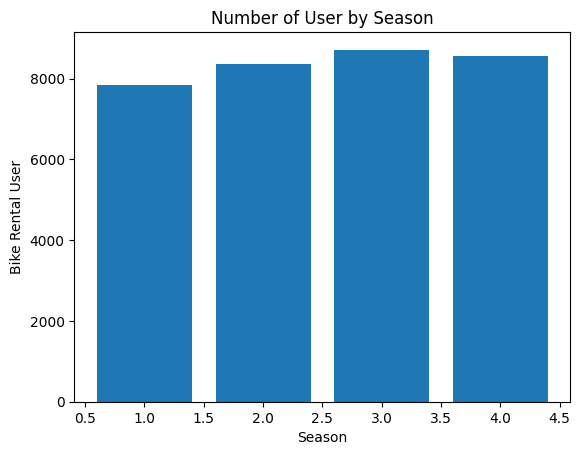

In [42]:
# Bar Chart
# berdasarkan musim

day_df = pd.read_csv('day.csv')
day_df = day_df[['season', 'cnt']].rename(columns={
    'season': 'Season',
    'cnt': 'User'
})
day_df.sort_values(by='Season', inplace=True)

plt.bar(x=day_df["Season"], height=day_df["User"])
plt.xlabel("Season")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Season")
plt.show()



* 1: springer
* 2: summer
* 3: fall
* 4: winter



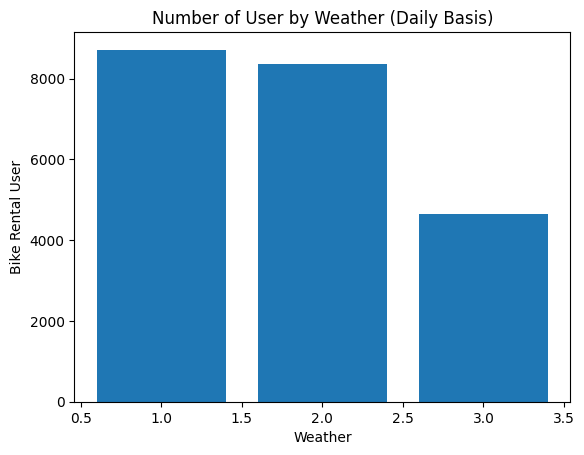

In [43]:
# Bar Chart
# Berdasarkan cuaca
# Dataset day.csv

day_df = pd.read_csv('day.csv')
day_df = day_df[['weathersit', 'cnt']].rename(columns={
    'weathersit': 'Weather',
    'cnt': 'User'
})
day_df.sort_values(by='Weather', inplace=True)

plt.bar(x=day_df["Weather"], height=day_df["User"])
plt.xlabel("Weather")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Weather (Daily Basis)")
plt.show()

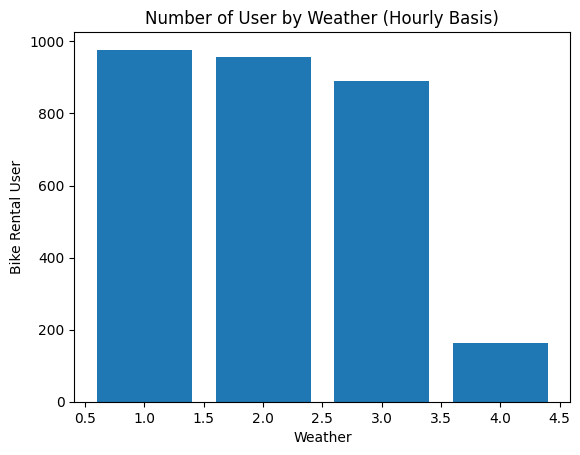

In [44]:
# Bar Chart
# Berdasarkan cuaca
# Dataset hour.csv

hour_df = pd.read_csv('hour.csv')
hour_df = hour_df[['weathersit', 'cnt']].rename(columns={
    'weathersit': 'Weather',
    'cnt': 'User'
})
hour_df.sort_values(by='Weather', inplace=True)

plt.bar(x=hour_df["Weather"], height=hour_df["User"])
plt.xlabel("Weather")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Weather (Hourly Basis)")
plt.show()


Weather ✈
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



<ipython-input-45-2c1268632da2>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby('atemp_grouped')['User'].sum().reset_index()


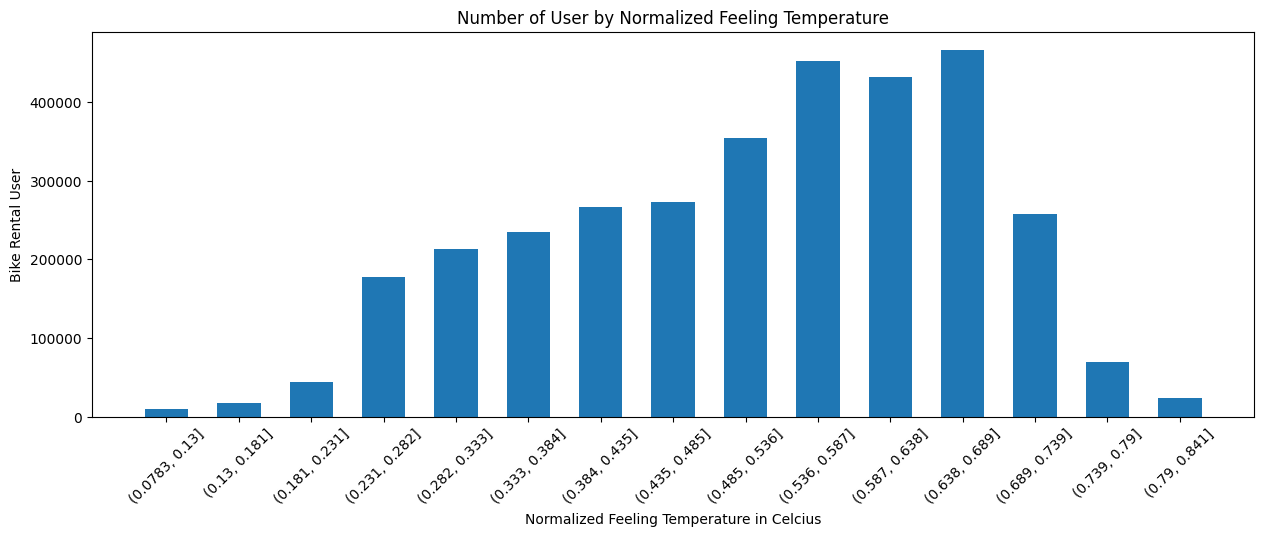

In [45]:
# Bar Chart
# berdasarkan suhu yang dirasakan

day_df = pd.read_csv('day.csv')
day_df = day_df[['atemp', 'cnt']].rename(columns={
    'atemp': 'Temp',
    'cnt': 'User'
})
day_df['atemp_grouped'] = pd.cut(day_df['Temp'], bins=15) #binning
grouped_data = day_df.groupby('atemp_grouped')['User'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(x=grouped_data['atemp_grouped'].astype(str), height=grouped_data['User'], width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Normalized Feeling Temperature in Celcius")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Normalized Feeling Temperature")
plt.show()

* Normalized feeling temperature has been divided to 50



<ipython-input-46-686a7c28d3f1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby('temp_grouped')['User'].sum().reset_index()


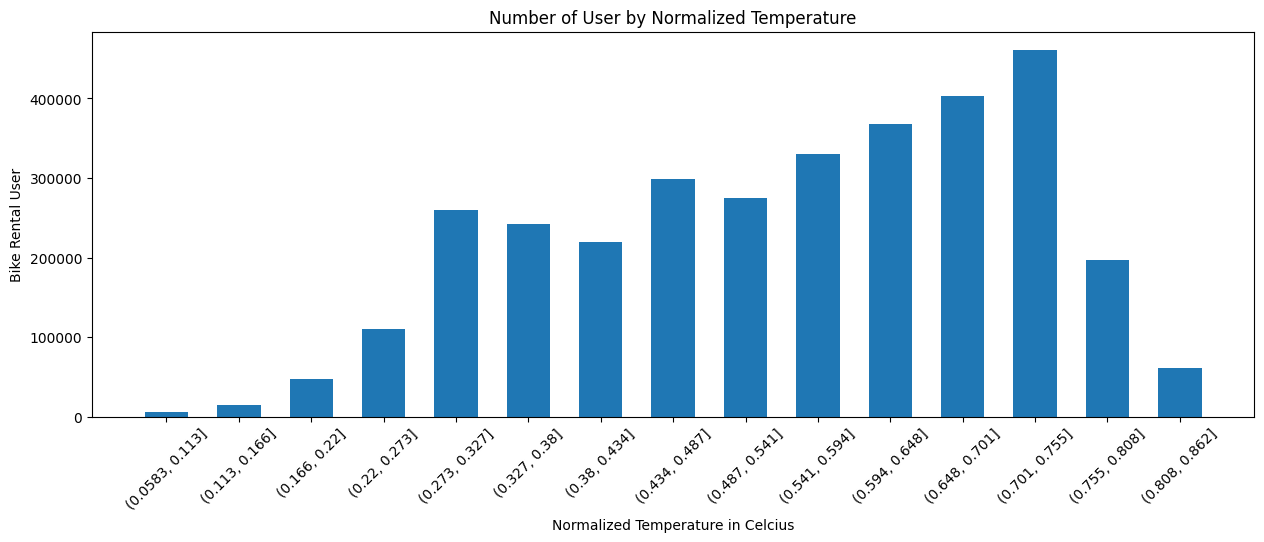

In [46]:
# Bar Chart
# berdasarkan suhu

day_df = pd.read_csv('day.csv')
day_df = day_df[['temp', 'cnt']].rename(columns={
    'temp': 'Temp',
    'cnt': 'User'
})
day_df['temp_grouped'] = pd.cut(day_df['Temp'], bins=15) #binning
grouped_data = day_df.groupby('temp_grouped')['User'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(x=grouped_data['temp_grouped'].astype(str), height=grouped_data['User'], width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Normalized Temperature in Celcius")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Normalized Temperature")
plt.show()

* Normalized temperature has been divided to 41

<ipython-input-47-ce1420db5999>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby('hum_grouped')['User'].sum().reset_index()


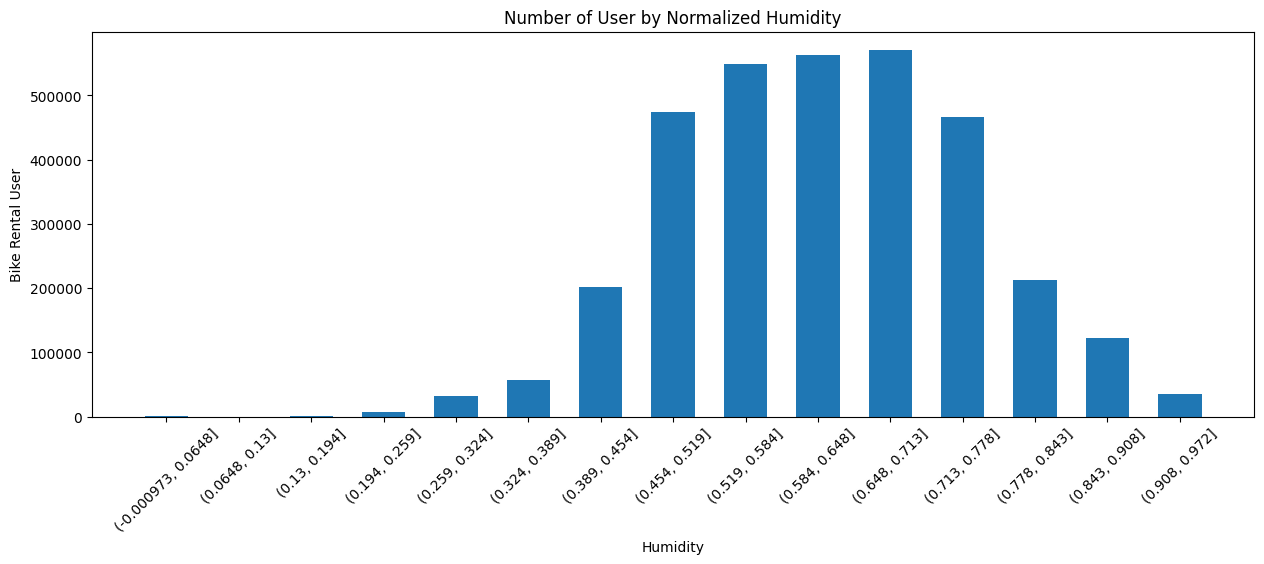

In [47]:
# Bar Chart
# berdasarkan kelembaban

day_df = pd.read_csv('day.csv')
day_df = day_df[['hum', 'cnt']].rename(columns={
    'hum': 'Hum',
    'cnt': 'User'
})
day_df['hum_grouped'] = pd.cut(day_df['Hum'], bins=15) #binning
grouped_data = day_df.groupby('hum_grouped')['User'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(x=grouped_data['hum_grouped'].astype(str), height=grouped_data['User'], width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Humidity")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Normalized Humidity")
plt.show()


* Normalized humidity has been divided to 100



<ipython-input-48-8ecf1669d31e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = day_df.groupby('WS_grouped')['User'].sum().reset_index()


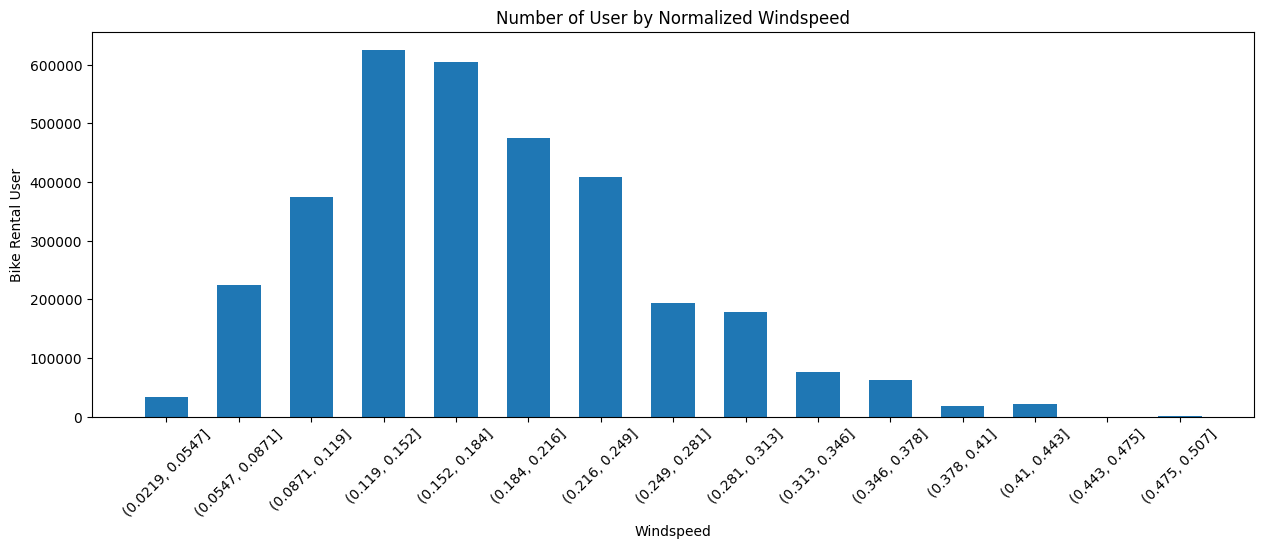

In [48]:
# Bar Chart
# berdasarkan kecepatan angin

day_df = pd.read_csv('day.csv')
day_df = day_df[['windspeed', 'cnt']].rename(columns={
    'windspeed': 'WS',
    'cnt': 'User'
})
day_df['WS_grouped'] = pd.cut(day_df['WS'], bins=15) #binning
grouped_data = day_df.groupby('WS_grouped')['User'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(x=grouped_data['WS_grouped'].astype(str), height=grouped_data['User'], width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Windspeed")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Normalized Windspeed")
plt.show()

* Normalized Windspeed has been divided to 67

**▶ Insight Pertanyaan 1 ◀**

* Kondisi lingkungan terbagi menjadi 4: berdasarkan musim, cuaca, suhu yang dirasakan, suhu,  kelembaban, dan kecepatan angin.
* Bar chart Pengguna berdasarkan musim memiliki nilai sumbu x 1,2,3, dan 4 yang masing-masing mewakili 1 musim. sumbu y adalah jumlah pengguna rental sepeda. Distribusi pengguna rental sepeda paling tinggi jumlahnya berada di angka 3 yang menunjukkan musim gugur (fall). Distribusi data left-skewed yg kurang sempurna.
* Bar chart Pengguna berdasarkan cuaca pada kedua dataset (day.csv dan hour.csv) memiliki nilai sumbu x 1,2, 3 dan 1,2,3,4 yang masing-masing mewakili 1 cuaca. sumbu y adalah jumlah pengguna rental sepeda. Distribusi pengguna rental sepeda terkonsentrasi pada bagian kiri sehingga memiliki tipe distribusi right-skewed. angka 1 menunjukkan cuaca cerah.
* Bar chart Pengguna berdasarkan Feeling Temperature (suhu yg dirasakan) menggunakan metode binning untuk membagi parameter atemp (sumbu x) ke dalam 15 interval dikarenakan nilai pada kolom atemp terlalu banyak. Distribusi pengguna rental sepeda dengan data paling banyak berada pada interval 0.689 - 0.739. Distribusi data left-skewed yg kurang sempurna.
* Bar chart Pengguna berdasarkan Temperature (suhu ruang) menggunakan metode binning untuk membagi parameter temp (sumbu x) ke dalam 15 interval dikarenakan nilai pada kolom temp terlalu banyak. Distribusi pengguna rental sepeda dengan data paling banyak berada pada interval 0.701 - 0.755. Distribusi data left-skewed yg kurang sempurna.
* Bar chart Pengguna berdasarkan Kelembaban menggunakan metode binning untuk membagi parameter hum (sumbu x) ke dalam 15 interval dikarenakan nilai pada kolom hum terlalu banyak. Distribusi pengguna rental sepeda dengan data paling banyak berada pada interval 0.648 - 0.713. Distribusi pengguna adalah left-skewed yg kurang sempurna.
* Bar chart Pengguna berdasarkan Kecepatan Angin menggunakan metode binning untuk membagi parameter suhu (sumbu x) ke dalam 15 interval dikarenakan nilai pada kolom windspeed terlalu banyak. Distribusi pengguna rental sepeda dengan data paling banyak berada pada interval 0.119 - 0.152. Distribusi pengguna adalah right-skewed yg kurang sempurna.


### Pertanyaan 2: Seberapa sering user melakukan rental sepeda berdasarkan jam?


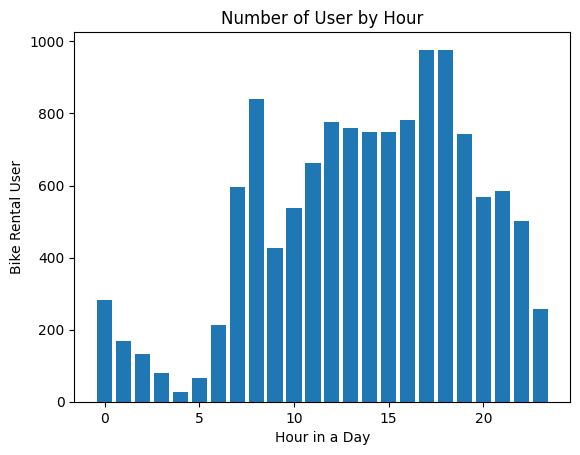

In [49]:
# Bar Chart

hour_df = pd.read_csv('hour.csv')
hour_df = hour_df[['hr', 'cnt']].rename(columns={
    'hr': 'Hour',
    'cnt': 'User'
})
hour_df.sort_values(by='Hour', inplace=True)

plt.bar(x=hour_df["Hour"], height=hour_df["User"])
plt.xlabel("Hour in a Day")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Hour")
plt.show()

* Hour start with 0 and end with 23

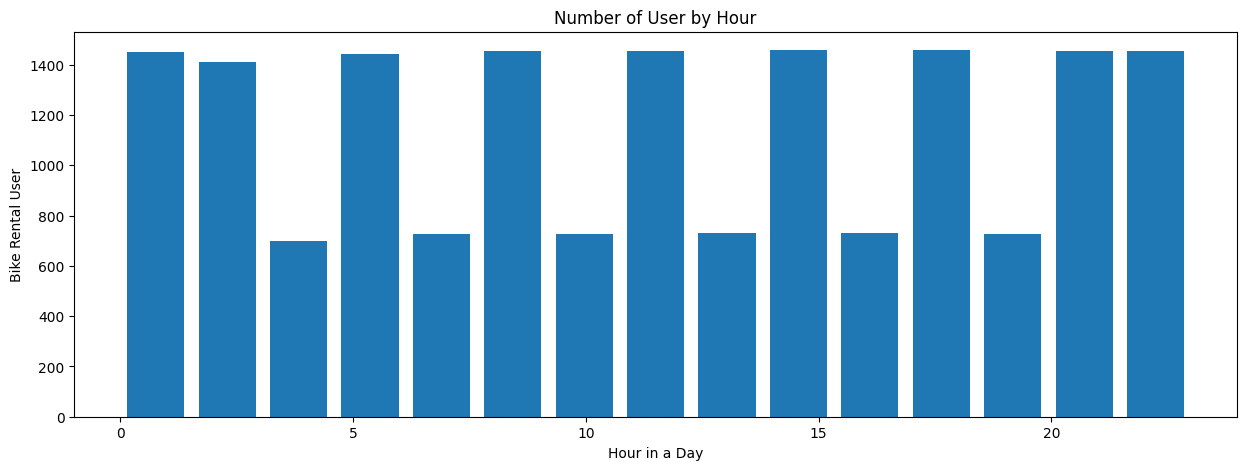

In [50]:
# Histogram

hour_df = pd.read_csv('hour.csv')
hour_df = hour_df[['hr', 'cnt']].rename(columns={
    'hr': 'Hour',
    'cnt': 'User'
})
hour_df.sort_values(by='Hour', inplace=True)

plt.figure(figsize=(15, 5))
plt.hist(x=hour_df["Hour"], bins=15, rwidth=0.8)
plt.xlabel("Hour in a Day")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Hour")
plt.show()

**▶ Insight Pertanyaan 2 ◀**
* Grafik pertama menujukkan Bar chart dengan distribusi pengguna rental sepeda berdasarkan jam. Jam dengan pengguna paling banyak melakukan rental adalah pada jam ke 17 dan 18. Distribusi pengguna cenderung left-skewed dan tidak sempurna.
* Grafik kedua menunjukkan histogram hubungan variabel Pengguna rental sepeda dan Jam. Histogram menggunakan metode binning dan membaginya menjadi 15 interval. Distribusi pengguna pada histogram adalah distribusi multimodal karena memiliki beberapa nilai puncak.


## Analisis Lanjutan (Opsional)

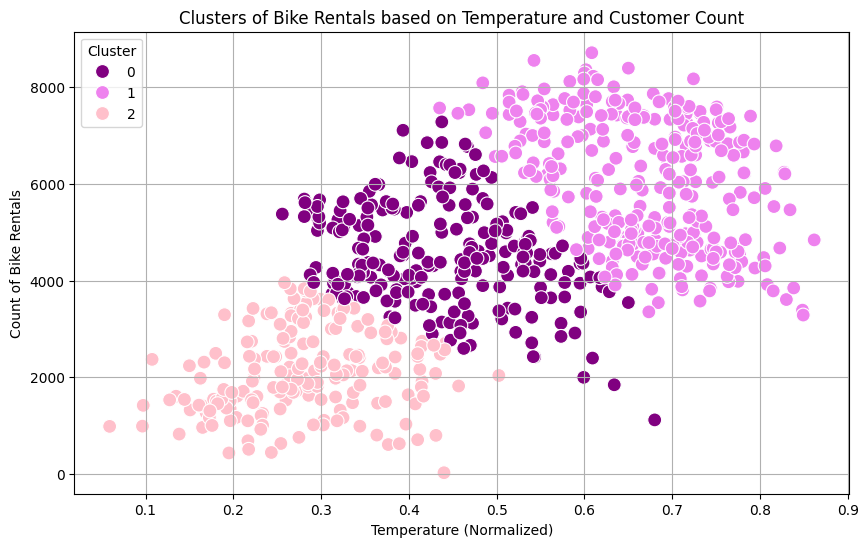

In [79]:
# Scatterplot dengan Teknik Clustering

df = pd.read_csv('day.csv')
data = df[['temp', 'cnt']]

# Standardize Features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=40)
df['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='Cluster', palette=['purple', 'violet', 'pink'], data=df, s=100)
plt.title("Clusters of Bike Rentals based on Temperature and Customer Count")
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Count of Bike Rentals")
plt.legend(title='Cluster', loc='upper left')
plt.grid(True)
plt.show()

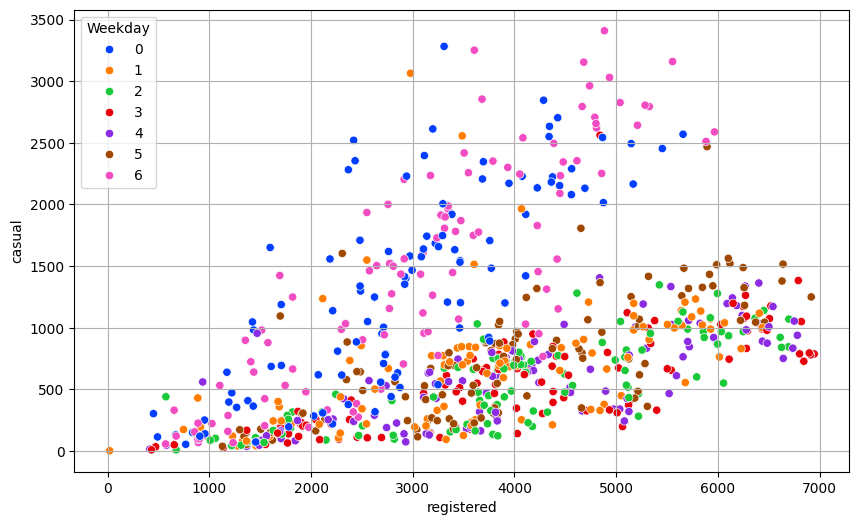

In [61]:
# Scatter plot
# Hubungan antara variabel user casual dan user registered berdasarkan hari

day_df = pd.read_csv('day.csv')
bikesharing = day_df

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikesharing, x='registered', y='casual', hue='weekday',palette='bright')
plt.legend(title='Weekday', loc='upper left')
plt.grid(True)
plt.show()

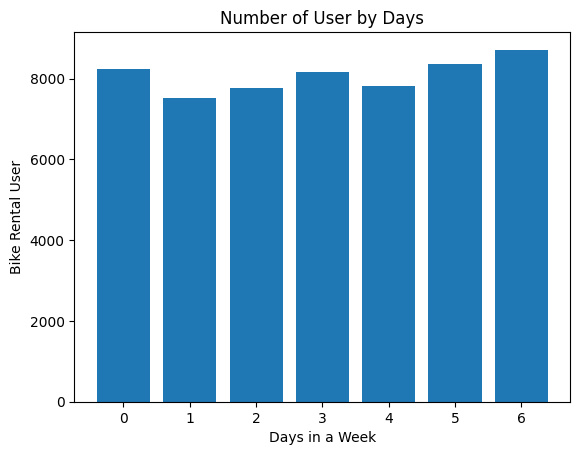

In [ ]:
# Bar Chart
# User berdasarkan hari dalam smeinggu

day_df = pd.read_csv('day.csv')
day_df = day_df[['weekday', 'cnt']].rename(columns={
    'weekday': 'Day',
    'cnt': 'User'
})
day_df.sort_values(by='Day', inplace=True)

plt.bar(x=day_df["Day"], height=day_df["User"])
plt.xlabel("Days in a Week")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Days")
plt.show()

* Grafik Bar di atas menunjukkan distribusi pengguna rental sepeda perhari dalam seminggu. Bar chart tersebut memiliki distribusi yang cenderung left-skewed dengan data paling banyak pada hari ke 6 yaitu sabtu.

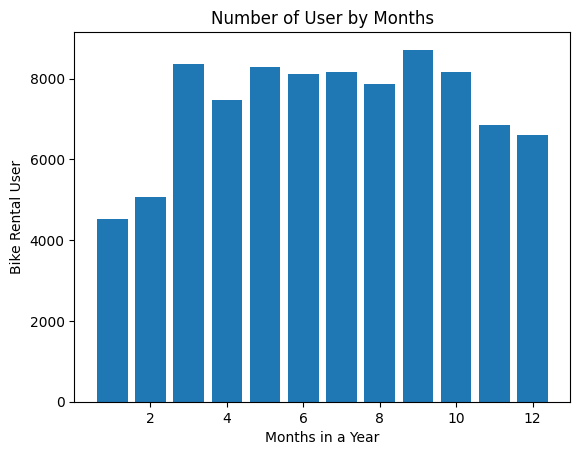

In [ ]:
# Bar Chart
# User berdasarkan bulan

day_df = pd.read_csv('day.csv')
day_df = day_df[['mnth', 'cnt']].rename(columns={
    'mnth': 'Month',
    'cnt': 'User'
})
day_df.sort_values(by='Month', inplace=True)

plt.bar(x=day_df["Month"], height=day_df["User"])
plt.xlabel("Months in a Year")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Months")
plt.show()

* Grafik Bar di atas menunjukkan distribusi pengguna rental sepeda perbulan dalam satu tahun. Bar chart tersebut memiliki distribusi yang cenderung left-skewed dengan data paling banyak pada hari ke 9 yaitu September.

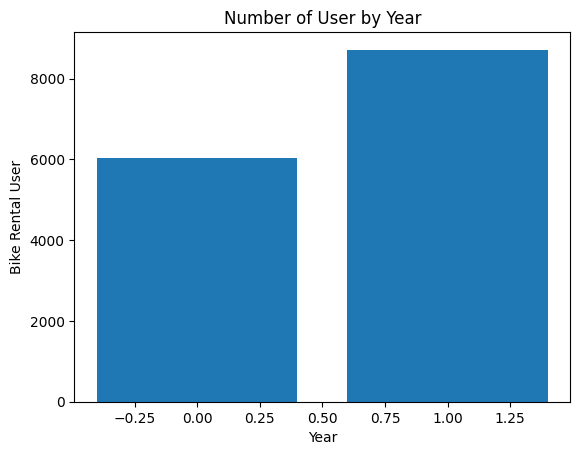

In [ ]:
# Bar Chart
# User berdasarkan tahun

day_df = pd.read_csv('day.csv')
day_df = day_df[['yr', 'cnt']].rename(columns={
    'yr': 'Year',
    'cnt': 'User'
})
day_df.sort_values(by='Year', inplace=True)

plt.bar(x=day_df["Year"], height=day_df["User"])
plt.xlabel("Year")
plt.ylabel("Bike Rental User")
plt.title("Number of User by Year")
plt.show()

* Grafik Bar di atas menunjukkan distribusi pengguna rental sepeda berdasarkan tahun. 0 untuk 2011, dan 1 untuk tahun 2012. Bar chart tersebut memiliki distribusi yang left-skewed dengan data paling banyak pada tahun 1 yaitu 2012.

* Grafik tersebut berupa scatter yang memiliki sumbu x dari kolom user registered dan sumbu y dari kolom user casual. ketersebaran pengguna memiliki warna yang masing-masing warna mewakili 1 hari dalam 1 minggu. ketersebaran berdasarkan hari mendominasi di hari 1,2,3,dan 4.

## Conclusion

**Conclution pertanyaan 1**
* Distribusi yang cenderung right-skewed terjadi pada pasangan variabel cuaca & pengguna, dan variabel kecepatan angin & pengguna.
* Distribusi yang cenderung left-skewed terjadi pada pasangan variabel musim & pengguna, variabel atemp & pengguna, variabel temp & pengguna, dan variabel humidity & pengguna.
* Kondisi lingkungan dan musim memengaruhi distribusi pengguna rental sepeda dikarenakan sepeda adalah alat transportasi yang tidak memiliki perlindungan untuk penggunanya.

**Conclution pertanyaan 2**
* Distribusi pengguna cenderung left-skewed, dan semakin tinggi pada jam menjelang malam.
* Pada jam-jam tersebut adalah jam luang pengguna user yang memilih transportasi sepeda.

In [ ]:
!conda activate main-ds
!pip install streamlit babel

/bin/bash: line 1: conda: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
